# <b>Data Visualization
</b>

In [1]:
import sys
sys.path.append('../')

from mltoolbox.metrics.utils import average_reports
import pandas as pd
import matplotlib.pyplot as plt
import fastplot
from utils.callbacks import *

DEMO = True

2023-01-10 11:15:16.434856: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Task01

<Figure size 640x480 with 0 Axes>

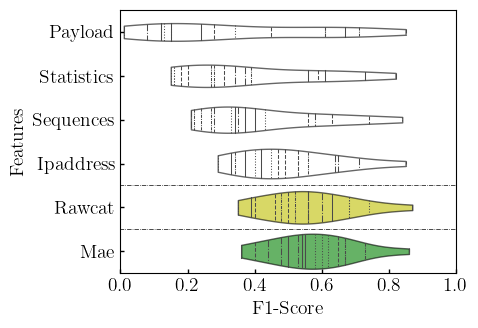

In [2]:
# Save final reports
features = ['payload', 'statistics', 'sequences', 
            'ipaddress', 'rawcat', 'mae']

dfs = []
for feature in features:
    for K in range(5):
        fname = f'../data/interim/task01_{feature}_deep_k{K}.csv'
        dfs.append(pd.read_csv(fname, index_col=[0]))

    report = pd.DataFrame(average_reports(dfs, output_dict=True)).T
    if not DEMO:
        report.to_csv(f'../data/results/task01_{feature}_deep.csv')

reps = []
for feature in features:
    rep = pd.read_csv(f'../data/results/task01_{feature}_deep.csv', index_col=[0])\
            .drop(index=['macro avg', 'weighted avg'])[['f1-score']]
    rep['feature'] = feature
    reps.append(rep)
    
df = pd.concat(reps, axis=0)

%matplotlib inline
plot = fastplot.plot(None,  None, mode = 'callback', 
                     callback = lambda plt: violin_task01(plt, df, features),
                     figsize=(5, 3.5), fontsize=14, style='latex')
plot.show()

if not DEMO:
    plot.savefig('../data/results/violin_task01_deep.png')
    plot.savefig('../data/results/violin_task01_deep.pdf')

# Shallow Learners

<Figure size 640x480 with 0 Axes>

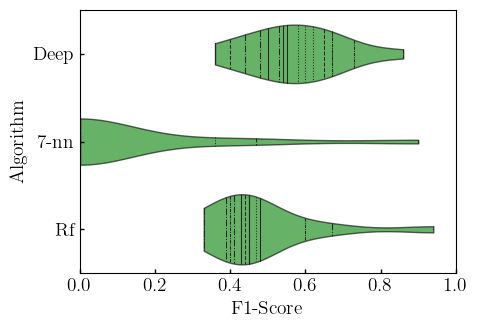

In [3]:
# Save final reports
dfs = []
for alg in ['7nn', 'rf']:
    for K in range(5):
        fname = f'../data/interim/task01_mae_{alg}_k{K}.csv'
        dfs.append(pd.read_csv(fname, index_col=[0]))

    report = pd.DataFrame(average_reports(dfs, output_dict=True)).T
    if not DEMO:
        report.to_csv(f'../data/results/task01_mae_{alg}.csv')
        
reps = []
for alg in ['deep', '7nn', 'rf']:
    rep = pd.read_csv(f'../data/results/task01_mae_{alg}.csv', index_col=[0])\
            .drop(index=['macro avg', 'weighted avg'])[['f1-score']]
    rep['algorithm'] = alg
    reps.append(rep)
    
df = pd.concat(reps, axis=0)

%matplotlib inline
plot = fastplot.plot(None,  None, mode = 'callback', 
                     callback = lambda plt: violin_shallow(plt, df),
                     figsize=(5, 3.5), fontsize=14, style='latex')
plot.show()

if not DEMO:
    plot.savefig('../data/results/violin_task01_shallow.png')
    plot.savefig('../data/results/violin_task01_shallow.pdf')

# Task02

<Figure size 640x480 with 0 Axes>

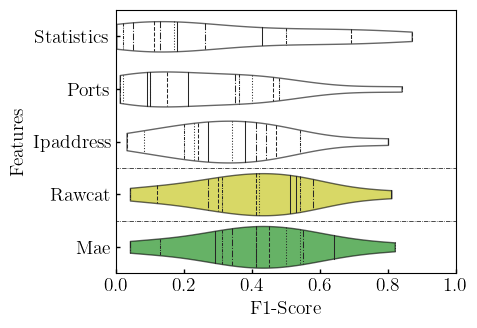

In [4]:
# Save final reports
features = ['statistics', 'ports', 'ipaddress', 
            'rawcat', 'mae']

dfs = []
for feature in features:
    for K in range(5):
        fname = f'../data/interim/task02_{feature}_deep_k{K}.csv'
        dfs.append(pd.read_csv(fname, index_col=[0]))

    report = pd.DataFrame(average_reports(dfs, output_dict=True)).T
    if not DEMO:
        report.to_csv(f'../data/results/task02_{feature}_deep.csv')
        
reps = []
for feature in features:
    rep = pd.read_csv(f'../data/results/task02_{feature}_deep.csv', index_col=[0])\
            .drop(index=['macro avg', 'weighted avg'])[['f1-score']]
    rep['feature'] = feature
    reps.append(rep)
    
df = pd.concat(reps, axis=0)

%matplotlib inline
plot = fastplot.plot(None,  None, mode = 'callback', 
                     callback = lambda plt: violin_task02(plt, df, features),
                     figsize=(5, 3.5), fontsize=14, style='latex')
plot.show()

if not DEMO:
    plot.savefig('../data/results/violin_task02_deep.png')
    plot.savefig('../data/results/violin_task02_deep.pdf')

# Task03

<Figure size 640x480 with 0 Axes>

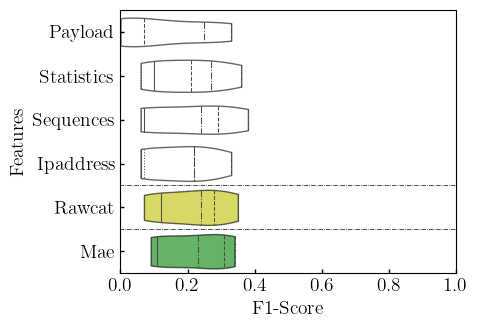

In [5]:
# Save final reports
features = ['payload', 'statistics', 'sequences', 
            'ipaddress', 'rawcat', 'mae']

dfs = []
for feature in features:
    for K in range(5):
        fname = f'../data/interim/task03_{feature}_deep_k{K}.csv'
        dfs.append(pd.read_csv(fname, index_col=[0]))

    report = pd.DataFrame(average_reports(dfs, output_dict=True)).T
    if not DEMO:
        report.to_csv(f'../data/results/task03_{feature}_deep.csv')
        
reps = []
for feature in features:
    rep = pd.read_csv(f'../data/results/task03_{feature}_deep.csv', index_col=[0])\
            .drop(index=['macro avg', 'weighted avg'])[['f1-score']]
    rep['feature'] = feature
    reps.append(rep)
    
df = pd.concat(reps, axis=0)

%matplotlib inline
plot = fastplot.plot(None,  None, mode = 'callback', 
                     callback = lambda plt: violin_task01(plt, df, features),
                     figsize=(5, 3.5), fontsize=14, style='latex')
plot.show()

if not DEMO:
    plot.savefig('../data/results/violin_task03_deep.png')
    plot.savefig('../data/results/violin_task03_deep.pdf')

# k-nearest-neighborhood comparison

<Figure size 640x480 with 0 Axes>

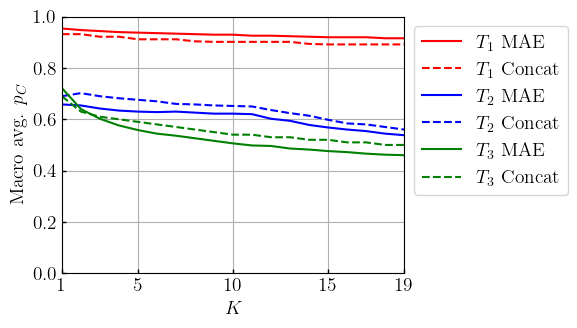

In [6]:
full = []
for task in ['task01', 'task02', 'task03']:
    for model in ['mae', 'rawcat']:
        f1s = []
        for k in range(1, 20):
            dfs = []
            for K in range(5):
                fname = f'../data/interim/{task}_{model}_{k}pc_k{K}.csv'
                df = pd.read_csv(fname, index_col=[0]).drop(columns=['support'])
                dfs.append(df)
            f1 = pd.concat(dfs, axis=1).mean(1)['macro avg']
            f1s.append((k, f1))
        df = pd.DataFrame(f1s, columns=['k', 'pc'])
        full.append((task, model, df))
        
%matplotlib inline
plot = fastplot.plot(None,  None, mode = 'callback', 
                     callback = lambda plt: plot_pc(plt, full),
                     figsize=(6, 3.5), fontsize=14, style='latex')
plot.show()

if not DEMO:
    plot.savefig('../data/results/kpc.png')
    plot.savefig('../data/results/kpc.pdf')

# Clustering evaluation - Task01

<Figure size 640x480 with 0 Axes>

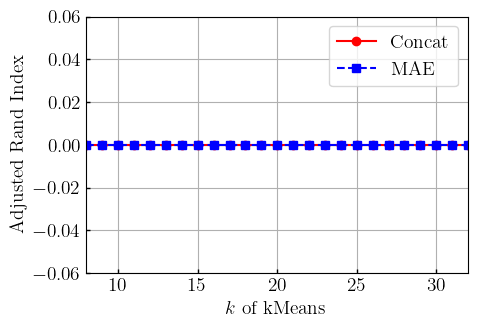

<Figure size 640x480 with 0 Axes>

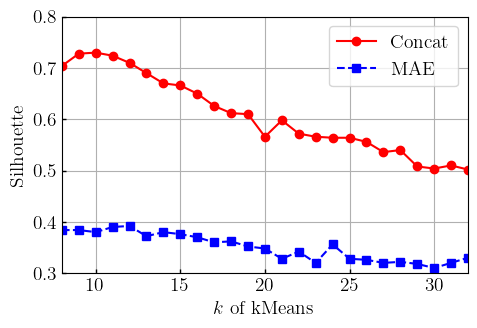

In [7]:
dfs = []
for K in range(5):
    fname = f'../data/interim/task01_clustering_k{K}.csv'
    dfs.append(pd.read_csv(fname, index_col=[0]))

sh_rawcat = pd.concat([dfs[K][['sh_rawcat']] for K in range(5)], axis=1).mean(1)
sh_mae = pd.concat([dfs[K][['sh_mae']] for K in range(5)], axis=1).mean(1)
ari_rawcat = pd.concat([dfs[K][['ar_rawcat']] for K in range(5)], axis=1).mean(1)
ari_mae = pd.concat([dfs[K][['ar_mae']] for K in range(5)], axis=1).mean(1)
    
%matplotlib inline
plot = fastplot.plot(None,  None, mode = 'callback', callback = lambda plt: plot_kmeans_ari(plt, ari_rawcat, ari_mae),
                     figsize=(5, 3.5), fontsize=14, style='latex')

plt.show()
if not DEMO:
    plot.savefig(f'../data/results/task01_ari.png')
    plot.savefig(f'../data/results/task01_ari.pdf')
    
%matplotlib inline
plot = fastplot.plot(None,  None, mode = 'callback', callback = lambda plt: plot_kmeans_sh(plt, sh_rawcat, sh_mae),
                     figsize=(5, 3.5), fontsize=14, style='latex')

plt.show()
if not DEMO:
    plot.savefig(f'../data/results/task01_sh.png')
    plot.savefig(f'../data/results/task01_sh.pdf')

# Grid Search - Task01

In [8]:
final = []
for l1 in [32, 64, 128, 256]:
    for l4 in [32, 64, 128, 256]:
        dfs = []
        for K in range(5):
            df = pd.read_csv(
                f'../data/interim/gridsearch_{l1}_{l4}_k{K}.csv', 
                index_col=[0])
            dfs.append(df)
        f1 = average_reports(dfs, output_dict=True)['macro avg']['f1-score']
        final.append((l1, l4, f1))
df = pd.DataFrame(final, columns=['l1', 'l4', 'f1'])
df = pd.pivot_table(df, index='l1', columns='l4', values='f1')

<Figure size 640x480 with 0 Axes>

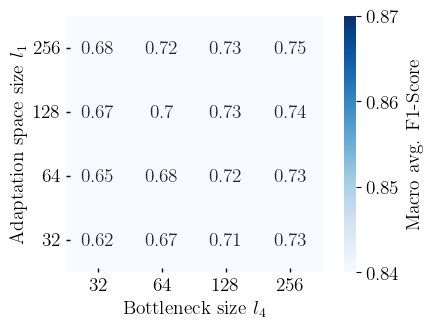

In [9]:
%matplotlib inline
plot = fastplot.plot(None,  None, mode = 'callback', 
                     callback = lambda plt: gs_heatmap(plt, df, vmin=.84,  vmax=.87),
                     figsize=(5, 3.5), fontsize=14, style='latex')
plot.show()

if not DEMO:
    plot.savefig('../data/results/gridsearch.png')
    plot.savefig('../data/results/gridsearch.pdf')

<Figure size 640x480 with 0 Axes>

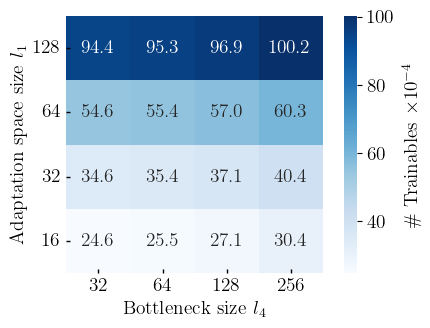

In [10]:
df = pd.read_csv('../data/interim/trainables.csv', index_col=[0])
df = pd.pivot_table(df, index='l1', columns='l4', values='trainables', aggfunc=lambda x: x)
    
%matplotlib inline
plot = fastplot.plot(None,  None, mode = 'callback', callback = lambda plt: gs_params_heatmap(plt, df),
                     figsize=(5, 3.5), fontsize=14, style='latex')
plot.show()

if not DEMO:
    plot.savefig('../data/results/parameters.png')
    plot.savefig('../data/results/parameters.pdf')